<a href="https://colab.research.google.com/github/kserdem/Covid_Patient_Event_Forecast/blob/main/Covid_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEĞİŞKEN BİLGİLERİ 
* **sex** (1-KADIN, 2-ERKEK)
* **patient_type** (1-AYAKTA, 2-YATARAK)
* **entry_date** 
* **date_symptoms** 
* **date_died**(Hastanın öldüğü tarih, "9999-99-99" iyileşti anlamına gelir.)
* **intubed**(1-EVET, 2-HAYIR)
* **pneumonia**(1-EVET, 2-HAYIR)

* **age**
* **pregnancy** (1-EVET, 2-HAYIR)
* **diabetes** (1-EVET, 2-HAYIR)
* **COPD** (1-EVET, 2-HAYIR) (Hastanın Kronik obstrüktif akciğer hastalığı (KOAH) olup olmadığını, evet için "1", hayır için "2", "97" "98" "99" olup olmadığını gösterir.)
* **asthma** (1-EVET, 2-HAYIR)
* **INMSPR** (1-EVET, 2-HAYIR)(
Hastanın bağışıklığı baskılanmış olup olmadığını gösterir, evet için "1", hayır için "2", "97" "98" "99" belirtilmedi anlamına gelir.)
* **hypertension** (1-EVET, 2-HAYIR)
* **other_disease** (1-EVET, 2-HAYIR)
* **cardiovascular**(1-EVET, 2-HAYIR)
* **obesity** (1-EVET, 2-HAYIR)
* **renal_chronic** (1-EVET, 2-HAYIR)(Hastanın kronik böbrek hastalığı olup olmadığını gösterir, evet için "1", hayır için "2", "97" "98" "99" belirtilmedi anlamına gelir)
* **tobacco** (1-EVET, 2-HAYIR)
* **contact_other_covid** (1-EVET, 2-HAYIR)
* **covid_res** (1-OLUMLU, 2-OLUMSUZ, 3-SONUÇ BEKLİYOR)(covid sonucu bekleme)
* **icu** (1-EVET, 2-HAYIR)( Hastanın Yoğun Bakım Ünitesine (YBÜ) kabul edilip edilmediğini, evet için “1”, hayır için “2”, “97” “98” “99” belirtilmedi anlamına gelip gelmediğini gösterir.)




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##KÜTÜPHANELERİN İMPORT EDİLMESİ

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
#from catboost import CatBoostClassifier
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:
path="/content/drive/My Drive/Covid_Data/"
First_data=pd.read_csv(path+"covid.csv")


##VERİ SETİNE İLK BAKIŞ

In [5]:
data=First_data.copy()
data.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,566602.0,1.506726,0.499955,1.0,1.0,2.0,2.0,2.0
patient_type,566602.0,1.215165,0.410937,1.0,1.0,1.0,1.0,2.0
intubed,566602.0,76.562952,39.058676,1.0,97.0,97.0,97.0,99.0
pneumonia,566602.0,1.846262,0.560939,1.0,2.0,2.0,2.0,99.0
age,566602.0,42.622483,16.659973,0.0,31.0,41.0,53.0,120.0
pregnancy,566602.0,50.400692,47.501579,1.0,2.0,97.0,97.0,98.0
diabetes,566602.0,2.210633,5.683523,1.0,2.0,2.0,2.0,98.0
copd,566602.0,2.280221,5.327832,1.0,2.0,2.0,2.0,98.0
asthma,566602.0,2.265029,5.334658,1.0,2.0,2.0,2.0,98.0
inmsupr,566602.0,2.319628,5.667381,1.0,2.0,2.0,2.0,98.0


In [8]:
data.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

##TARGET DEĞİŞKENİN DÜZENLENMESİ

In [9]:
#date_died değişkeninde 9999-99-9 değerini almış olanlar yaşıyor(true), diğer tarihler ölmüş(false) olarak değiştirildi.
#hastalıktan ölüm durumu -> false==1(evet),true==2(hayır) olarak belirlenecektir
def not_died(date):
  return date=='9999-99-99'

data['target_died']=data['date_died'].apply(not_died)



In [10]:
data.head(10)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,target_died
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,True
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,True
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,True
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,True
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,False
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1,False
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,2,2,2,2,1,2,2,2,2,2,99,1,2,True
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,2,2,2,2,1,2,2,2,1,1,1,1,97,True
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,2,2,2,2,2,2,2,2,2,2,99,1,97,True
9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39,2,2,2,2,2,2,2,2,1,2,2,99,1,2,True


In [11]:
#true- false şeklindeki boolen değerleri 0-1 formatına dönüştürdük
data['target_died']= data['target_died'].astype(int)
data['target_died'].head()

0    1
1    1
2    1
3    1
4    0
Name: target_died, dtype: int64

In [12]:
data['target_died']=data['target_died'].replace(1,2)
data['target_died']=data['target_died'].replace(0,1)
data['target_died'].head()


0    2
1    2
2    2
3    2
4    1
Name: target_died, dtype: int64

##KATEGORİK DEĞİŞKENLERİN UNIQUE DEĞERLERİNİN KONTROLÜ

In [13]:
data['diabetes'].unique()


array([ 2,  1, 98])

In [14]:
data['diabetes']= data['diabetes'].replace(98,2)
data['diabetes'].unique()


array([2, 1])

In [15]:
data['intubed'].unique()

array([97,  2,  1, 99])

In [16]:
data['intubed']=data['intubed'].replace(97,2)
data['intubed']=data['intubed'].replace(99,2)
data['intubed'].unique()

array([2, 1])

In [17]:
data['asthma'].unique()

array([ 2,  1, 98])

In [18]:
data['asthma']=data['asthma'].replace(98,2)
data['asthma'].unique()

array([2, 1])

In [19]:
data['cardiovascular'].unique()

array([ 2,  1, 98])

In [20]:
data['cardiovascular']=data['cardiovascular'].replace(98,2)
data['cardiovascular'].unique()


array([2, 1])

In [21]:
data['contact_other_covid'].unique()

array([ 2, 99,  1])

In [22]:
data['contact_other_covid']=data['contact_other_covid'].replace(99,2)
data['contact_other_covid'].unique()

array([2, 1])

In [23]:
data['covid_res'].unique()

array([1, 2, 3])

In [24]:
data['hypertension'].unique()

array([ 2,  1, 98])

In [25]:
data['hypertension']=data['hypertension'].replace(98,2)
data['hypertension'].unique()

array([2, 1])

In [26]:
data['icu'].unique()

array([97,  2,  1, 99])

In [27]:
data['icu']=data['icu'].replace(99,2)
data['icu']=data['icu'].replace(97,2)

data['icu'].unique()

array([2, 1])

In [28]:
data['inmsupr'].unique()

array([ 2,  1, 98])

In [29]:
data['inmsupr']=data['inmsupr'].replace(98,2)
data['inmsupr'].unique()

array([2, 1])

In [30]:
data['obesity'].unique()


array([ 2,  1, 98])

In [31]:
data['obesity']=data['obesity'].replace(98,2)
data['obesity'].unique()

array([2, 1])

In [32]:
data['other_disease'].unique()

array([ 2,  1, 98])

In [33]:
data['other_disease']=data['other_disease'].replace(98,2)
data['other_disease'].unique()

array([2, 1])

In [34]:
data['patient_type'].unique()

array([1, 2])

In [35]:
data['pneumonia'].unique()

array([ 2,  1, 99])

In [36]:
data['pneumonia']=data['pneumonia'].replace(99,2)
data['pneumonia'].unique()

array([2, 1])

In [37]:
data['pregnancy'].unique()

array([97,  2,  1, 98])

In [38]:
data['pregnancy']=data['pregnancy'].replace(97,2)
data['pregnancy']=data['pregnancy'].replace(98,2)
data['pregnancy'].unique()

array([2, 1])

In [39]:
data['renal_chronic'].unique()

array([ 2,  1, 98])

In [40]:
data['renal_chronic']=data['renal_chronic'].replace(98,2)
data['renal_chronic'].unique()

array([2, 1])

In [41]:
data['tobacco'].unique()

array([ 2,  1, 98])

In [42]:
data['tobacco']=data['tobacco'].replace(98,2)
data['tobacco'].unique()

array([2, 1])

In [43]:
data['copd'].unique()

array([ 2,  1, 98])

In [44]:
data['copd']=data['copd'].replace(98,2)
data['copd'].unique()

array([2, 1])

In [45]:
data['target_died'].unique()

array([2, 1])

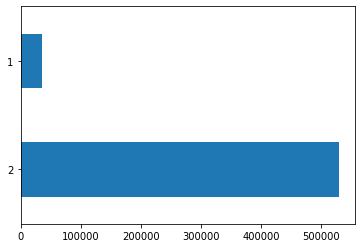

In [46]:
data['target_died'].value_counts().plot.barh()

##ENTRY_DATE VE DATE_SYMTOMPS ARASINDAKİ GÜN FARKININ BULUNMASI




In [47]:
data['entry_date'].head()

0    04-05-2020
1    19-03-2020
2    06-04-2020
3    17-04-2020
4    13-04-2020
Name: entry_date, dtype: object

In [48]:
data['entry_date']= pd.to_datetime(data.entry_date, format='%d-%m-%Y')
data['entry_date'].head()

0   2020-05-04
1   2020-03-19
2   2020-04-06
3   2020-04-17
4   2020-04-13
Name: entry_date, dtype: datetime64[ns]

In [49]:
data['date_symptoms'].head()

0    02-05-2020
1    17-03-2020
2    01-04-2020
3    10-04-2020
4    13-04-2020
Name: date_symptoms, dtype: object

In [50]:
data['date_symptoms'] = pd.to_datetime(data.date_symptoms, format='%d-%m-%Y')
data['date_symptoms'].head()

0   2020-05-02
1   2020-03-17
2   2020-04-01
3   2020-04-10
4   2020-04-13
Name: date_symptoms, dtype: datetime64[ns]

In [51]:
data['symptom_hospital'] = data['entry_date']-data['date_symptoms']
data['symptom_hospital'].head()


0   2 days
1   2 days
2   5 days
3   7 days
4   0 days
Name: symptom_hospital, dtype: timedelta64[ns]

In [52]:
data['symptom_hospital'].head(50)

0     2 days
1     2 days
2     5 days
3     7 days
4     0 days
5     0 days
6     9 days
7     3 days
8     4 days
9     5 days
10    0 days
11    2 days
12    0 days
13    2 days
14    3 days
15    4 days
16    9 days
17   10 days
18    4 days
19   10 days
20    0 days
21    0 days
22    3 days
23    1 days
24    9 days
25    2 days
26    2 days
27   10 days
28    4 days
29    1 days
30    5 days
31    6 days
32    4 days
33    3 days
34   11 days
35    0 days
36    0 days
37    7 days
38    3 days
39    6 days
40    7 days
41    3 days
42    5 days
43    8 days
44    4 days
45    4 days
46    0 days
47   11 days
48    0 days
49    8 days
Name: symptom_hospital, dtype: timedelta64[ns]

(0.0, 30.0)

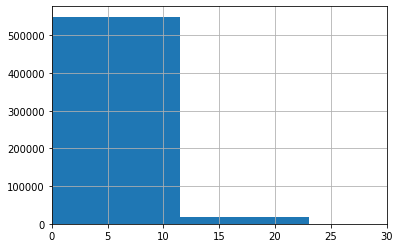

In [53]:
data['symptom_hospital'].dt.days.hist()
plt.xlim(xmin=0,xmax=30)


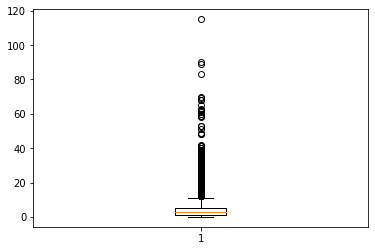

In [54]:
plt.boxplot(data['symptom_hospital'].dt.days);

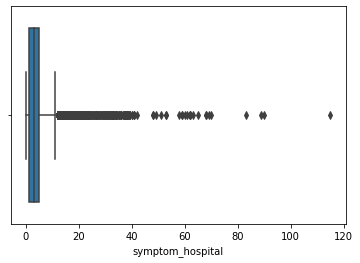

In [55]:
sns.boxplot(x=data['symptom_hospital'].dt.days);

(-1.0, 25.0)

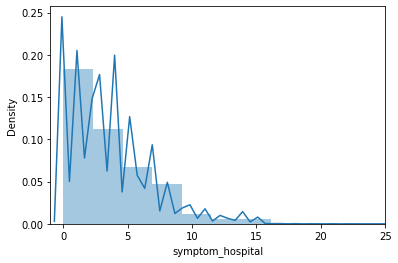

In [56]:
sns.distplot(data['symptom_hospital'].dt.days);
plt.xlim(-1,25)


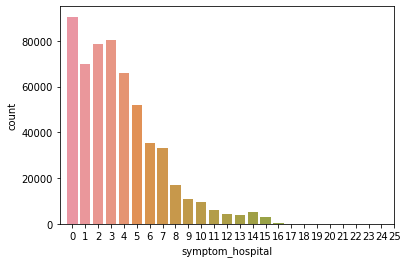

<Figure size 720x360 with 0 Axes>

In [57]:
sns.countplot(data['symptom_hospital'].dt.days);
plt.xlim(-1,25)
plt.figure(figsize=(10,5));


In [58]:
 #İnsanlar ilk semptom görüldükten sonra ortalama 3 gün içinde hastaneye başvurmuşlardır
 data['symptom_hospital'].describe().T

count                       566602
mean     3 days 15:58:26.880667558
std      3 days 06:44:15.922901697
min                0 days 00:00:00
25%                1 days 00:00:00
50%                3 days 00:00:00
75%                5 days 00:00:00
max              115 days 00:00:00
Name: symptom_hospital, dtype: object

In [59]:
data.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,target_died,symptom_hospital
0,16169f,2,1,2020-05-04,2020-05-02,9999-99-99,2,2,27,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2 days
1,1009bf,2,1,2020-03-19,2020-03-17,9999-99-99,2,2,24,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2 days
2,167386,1,2,2020-04-06,2020-04-01,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,2,1,2,2,5 days
3,0b5948,2,2,2020-04-17,2020-04-10,9999-99-99,2,1,30,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,7 days
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,2,1,2,1,0 days


## VERİ SETİNİN GÖRSELLEŞTİRİLMESİ VE CROSSTABLE YORUMU

* Hastalıktan dolayı hayatını kaybedenlerin 0.08'i erkek hastalar, 0.04'ü ise kadın hastalardan oluşmaktadır.
* Aynı zamanda yatan hastaların yaklaşık %26'sı hayatını kaybetmiştir.
* Kategorik değişkenlerin çapraz tablolarına baktığımızda ölüm olayını en çok etkileyeceğini düşüneceğimiz değişkenler sırasıyla şöyledir;

  *`intubet (%58)`*

 *`diabetes (%36)`*

 *`icu (%39)`*

 *`pneumonia (%29)`*

 *`renal_chronic (%24)`*

 *`copd (%22)`*

 *`cardiovasculer (%17)`*

 *`hypertension (%16)`*

 *`inmsupr (%15)`*

 *`other_disease (%13)`*

 *obesity (0.09)*

 *`tobacco (0.06)`*

 *`asthma (%0.04)`*

 *`contact_other_covid (0.015)`*

 *`pregnancy (0.01)`*





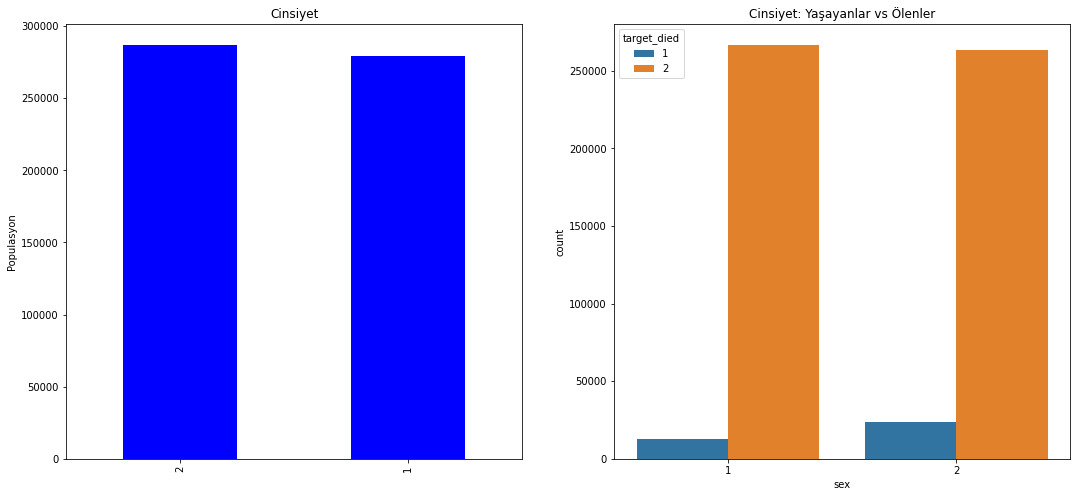

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))#subplot acılacak pencere sayısını gösterir
data["sex"].value_counts().plot.bar(color = "blue", ax = ax[0])
ax[0].set_title("Cinsiyet")
ax[0].set_ylabel("Populasyon")
sns.countplot("sex", hue = "target_died", data = data, ax = ax[1])
ax[1].set_title("Cinsiyet: Yaşayanlar vs Ölenler")
plt.show()

In [61]:
pd.pivot_table(data, index='sex')

,age,asthma,cardiovascular,contact_other_covid,copd,covid_res,diabetes,hypertension,icu,inmsupr,intubed,obesity,other_disease,patient_type,pneumonia,pregnancy,renal_chronic,target_died,tobacco
sex,,,,,,,,,,,,,,,,,,,
1,42.002633,1.959916,1.979116,1.588665,1.984543,1.760414,1.880293,1.839969,1.987076,1.983227,1.987703,1.829983,1.965401,1.174754,1.875659,1.985463,1.982361,1.954574,1.944381
2,43.225877,1.976236,1.975835,1.627661,1.983247,1.697731,1.869828,1.833581,1.977361,1.985058,1.977263,1.844124,1.974177,1.254503,1.813930,2.000000,1.977988,1.918220,1.886901


In [62]:
pd.crosstab(data['sex'], data['target_died'])

target_died,1,2
sex,,
1,12696,266794
2,23480,263632


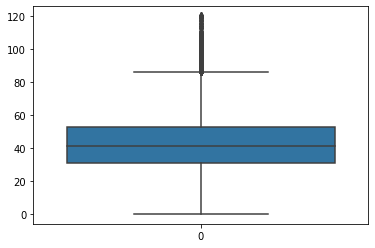

In [63]:
sns.boxplot(data=data['age']);

In [64]:
#2 -> Not died
#1 -> Died
cross=pd.crosstab(index=data['target_died'], columns=data["diabetes"],normalize='index')

cross.index=["1_Died","2_Not_Died"]
cross
#diyabet hastalığı bulunup covide yakalanmış ve ölmüş olan kişiler %36 dır ve diyabeti olup ölmeyenler %10'dur.
#veri kümesindeki kişilerin yaklaşık %12 diyabete sahiptir.


diabetes,1,2
1_Died,0.366293,0.633707
2_Not_Died,0.108554,0.891446


In [65]:
def pivot2(x):
  return pd.crosstab(x, data['target_died'],normalize='index').T
def pivot(x):
  return pd.crosstab(x, data['target_died']).T
  


In [66]:
pivot(data['diabetes'])

diabetes,1,2
target_died,,
1,13251,22925
2,57580,472846


In [67]:
pivot(data['tobacco'])


tobacco,1,2
target_died,,
1,3339,32837
2,44678,485748


In [68]:
pivot2(data['tobacco'])

tobacco,1,2
target_died,,
1,0.069538,0.06332
2,0.930462,0.93668


In [69]:
pivot(data['intubed'])

intubed,1,2
target_died,,
1,5788,30388
2,4177,526249


In [70]:
pivot2(data['intubed'])
#ölüm olaylarının %58'i entrübe edilmiş hastalarda %23'ü de entrübe olmayan hastalarda gerçekleşmiştir.

intubed,1,2
target_died,,
1,0.580833,0.054592
2,0.419167,0.945408


In [71]:
pivot(data['asthma'])


asthma,1,2
target_died,,
1,737,35439
2,17289,513137


In [72]:
pivot2(data['asthma'])

asthma,1,2
target_died,,
1,0.040885,0.064602
2,0.959115,0.935398


In [73]:
pivot(data['cardiovascular'])

cardiovascular,1,2
target_died,,
1,2219,33957
2,10556,519870


In [74]:
pivot2(data['cardiovascular'])
#kardiyovasküler hastalıkları olanların %17'si hayatını kaybetmiştir.

cardiovascular,1,2
target_died,,
1,0.173699,0.061313
2,0.826301,0.938687


In [75]:
pivot(data['contact_other_covid'])

contact_other_covid,1,2
target_died,,
1,3374,32802
2,218493,311933


In [76]:
pivot2(data['contact_other_covid'])

contact_other_covid,1,2
target_died,,
1,0.015207,0.095151
2,0.984793,0.904849


In [77]:
pivot(data['hypertension'])

hypertension,1,2
target_died,,
1,15136,21040
2,77372,453054


In [78]:
pivot2(data['hypertension'])
#hipertansiyon hastalarının %16'sı hayatını kaybetmiştir

hypertension,1,2
target_died,,
1,0.163618,0.044379
2,0.836382,0.955621


In [79]:
pivot(data['inmsupr'])

inmsupr,1,2
target_died,,
1,1364,34812
2,7614,522812


In [80]:
pivot2(data['inmsupr'])
#bağışıklığı baskılanan hastaların %15'i hayatını kaybetmiştir.

inmsupr,1,2
target_died,,
1,0.151927,0.062429
2,0.848073,0.937571


In [81]:
pivot(data['icu'])

icu,1,2
target_died,,
1,3948,32228
2,6164,524262


In [82]:
pivot2(data['icu'])
#Yoğun bakım hastalarının %39'u nun sağlık durumu ölümle sonuçlanmıştır.

icu,1,2
target_died,,
1,0.390427,0.057913
2,0.609573,0.942087


In [83]:
pivot(data['other_disease'])

other_disease,1,2
target_died,,
1,2265,33911
2,14819,515607


In [84]:
pivot2(data['other_disease'])
#başka kronik rahatsızlığı bulunmayanlar %93 iyileşmiştir.

other_disease,1,2
target_died,,
1,0.13258,0.06171
2,0.86742,0.93829


In [85]:
pivot(data['pneumonia'])

pneumonia,1,2
target_died,,
1,26324,9852
2,61851,468575


In [86]:
pivot2(data['pneumonia'])
#akciğer iltihabı bulunun kişilerin %29'u hayatını kaybetmiştir.

pneumonia,1,2
target_died,,
1,0.298543,0.020592
2,0.701457,0.979408


In [87]:
pivot(data['renal_chronic'])

renal_chronic,1,2
target_died,,
1,2786,33390
2,8464,521962


In [88]:
pivot2(data['renal_chronic'])
#Böbrek rahatsızlığı bulunanların %24'ü hayatını kaybetmiştir.

renal_chronic,1,2
target_died,,
1,0.247644,0.060124
2,0.752356,0.939876


In [89]:
pivot(data['pregnancy'])

pregnancy,1,2
target_died,,
1,48,36128
2,4015,526411


In [90]:
pivot2(data['pregnancy'])
#hamile iken kovide yakalananların %0.01'i hayatını kaybetmiştir. Hamilelik durumunun ölüm durumuna etkisinin bulunmadığı yorumu yapılabilir.

pregnancy,1,2
target_died,,
1,0.011814,0.064223
2,0.988186,0.935777


In [91]:
pivot(data['sex'])

sex,1,2
target_died,,
1,12696,23480
2,266794,263632


In [92]:
pivot2(data['sex'])
#erkeklerin %0.08 i kadınların %0.04'ü hayatını kaybetmiştir

sex,1,2
target_died,,
1,0.045426,0.08178
2,0.954574,0.91822


In [93]:
pivot(data['patient_type'])

patient_type,1,2
target_died,,
1,3620,32556
2,441069,89357


In [94]:
pivot2(data['patient_type'])
#Yatan hastaların %26'sı hayatını kaybetmiştir

patient_type,1,2
target_died,,
1,0.008141,0.267043
2,0.991859,0.732957


In [95]:
pivot(data['copd'])

copd,1,2
target_died,,
1,2033,34143
2,7097,523329


In [96]:
pivot2(data['copd'])

copd,1,2
target_died,,
1,0.222673,0.061246
2,0.777327,0.938754


In [97]:
pivot2(data['covid_res'])

covid_res,1,2,3
target_died,,,
1,0.12291,0.025086,0.030713
2,0.87709,0.974914,0.969287


In [98]:
pivot(data['obesity'])

obesity,1,2
target_died,,
1,8444,27732
2,83828,446598


In [99]:
pivot2(data['obesity'])

obesity,1,2
target_died,,
1,0.091512,0.058466
2,0.908488,0.941534


In [125]:
pivot2(data['patient_type'])

patient_type,1,2
target_died,,
1,0.008141,0.267043
2,0.991859,0.732957


# Veri Setinin Test-Train Ayrımı


In [60]:
data.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,target_died,symptom_hospital
0,16169f,2,1,2020-05-04,2020-05-02,9999-99-99,2,2,27,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2 days
1,1009bf,2,1,2020-03-19,2020-03-17,9999-99-99,2,2,24,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2 days
2,167386,1,2,2020-04-06,2020-04-01,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,2,1,2,2,5 days
3,0b5948,2,2,2020-04-17,2020-04-10,9999-99-99,2,1,30,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,7 days
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,2,1,2,1,0 days


In [100]:
y=data['target_died']
X= data[['intubed',	'pneumonia','age','pregnancy','diabetes','copd',	'asthma','inmsupr',
         'hypertension',	'other_disease','cardiovascular','obesity','renal_chronic',
         'tobacco',	'contact_other_covid','covid_res','icu','sex'	,'patient_type']]

In [66]:
X.head()
#y.head()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,sex,patient_type
0,2,2,27,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1
1,2,2,24,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1
2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,2,1,2,1,2
3,2,1,30,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2
4,2,2,60,2,1,2,2,2,1,2,1,2,2,2,2,1,2,1,2


In [101]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (379623, 19)
y_train (379623,)
X_test (186979, 19)
y_test (186979,)


## MODELLERİN UYGULANMASI

#Lojistik Regresyon

In [102]:
loj=LogisticRegression(solver='liblinear')
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
loj_model.sparsify()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

0.9412821688784268

In [104]:
 pip install scikit-plot

In [105]:
 import scikitplot as skplt

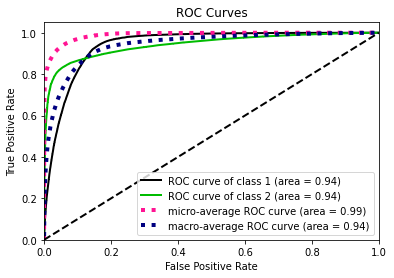

In [89]:
skplt.metrics.plot_roc(y_test, loj_model.predict_proba(X_test))
plt.show()

## Random Forest 




 **Model eğitildikten sonra en önemli 5 değişken şöyle belirlenmiştir:**


*   age
*   patient_type

*   pneumonia
*   covid_res

*   intubed








In [106]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
cross_val_score(rf_model,X_test,y_test,cv=10).mean()

0.9329764339807218

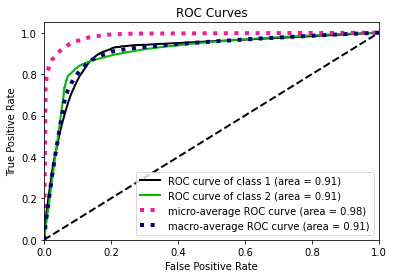

In [107]:
skplt.metrics.plot_roc(y_test, rf_model.predict_proba(X_test))
plt.show()

In [108]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)



Text(0.5, 0, 'Değişken Önem Düzeyleri')

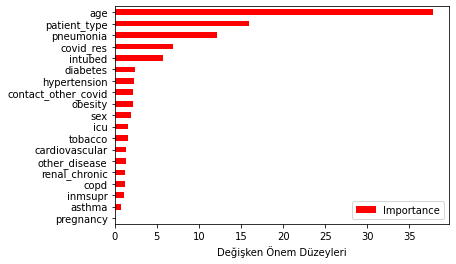

In [109]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

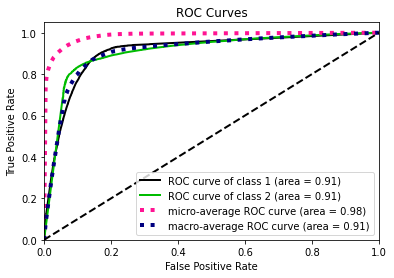

In [90]:
skplt.metrics.plot_roc(y_test, rf_tuned.predict_proba(X_test))
plt.show()

##Decision Tree

 **Model eğitildikten sonra en önemli 5 değişken şöyle belirlenmiştir:**

*   patient_type
*   age



*   covid_res
*   intubed
*   pneumonia



In [110]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
cross_val_score(cart_model,X_test,y_test,cv=10).mean()

0.9242214380140286

In [120]:
Importance = pd.DataFrame({"Importance": cart_model.feature_importances_*100},
                         index = X_train.columns)


Text(0.5, 0, 'Değişken Önem Düzeyleri')

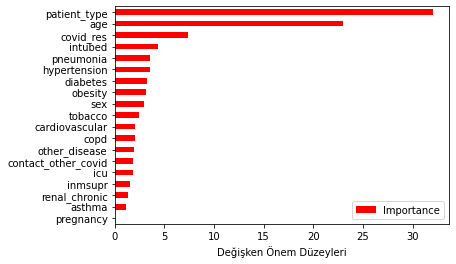

In [121]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

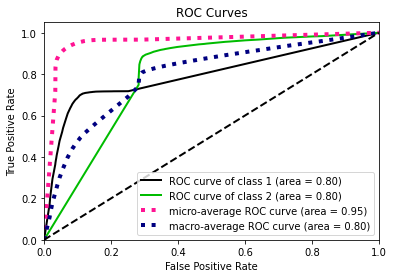

In [72]:
skplt.metrics.plot_roc(y_test, cart_model.predict_proba(X_test))
plt.show()

## GBM MODEL

**Model eğitildikten sonra en önemli 5 değişken şöyle belirlenmiştir:**

*   patient_type
*   pneumonia
*   age

*   covid_res
*   intubed



In [113]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
cross_val_score(gbm_model,X_test,y_test,cv=10).mean()

0.9423304176272287

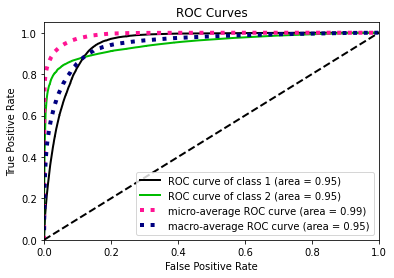

In [114]:
skplt.metrics.plot_roc(y_test, gbm_model.predict_proba(X_test))
plt.show()

In [122]:
Importance = pd.DataFrame({"Importance": gbm_model.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

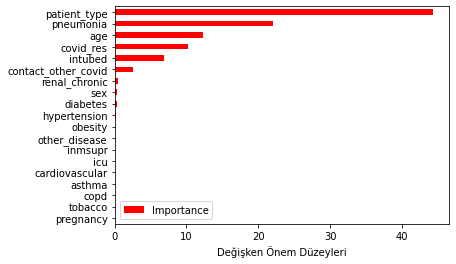

In [123]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

##MODELLERİN KARŞILAŞTIRILMASI

In [117]:
modeller = [
    loj_model,
    cart_model,
    gbm_model,
    rf_model,
  
]


for model in modeller:
    isimler = model.__class__.__name__
    cv_dogruluk=cross_val_score(model,X_test,y_test,cv=10).mean()
   
    print("*"*28)
    print(isimler + ":" )
    print("Cross Validation Accuracy: {:.4%}".format(cv_dogruluk))

****************************
LogisticRegression:
Cross Validation Accuracy: 94.1282%
****************************
DecisionTreeClassifier:
Cross Validation Accuracy: 92.4098%
****************************
GradientBoostingClassifier:
Cross Validation Accuracy: 94.2330%
****************************
RandomForestClassifier:
Cross Validation Accuracy: 93.2864%


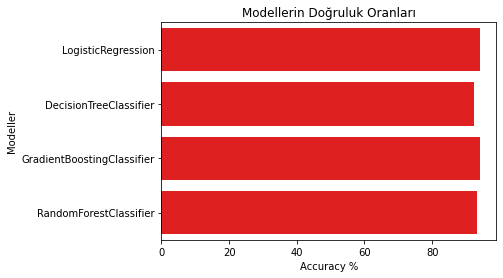

In [119]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    cv_dogruluk=cross_val_score(model,X_test,y_test,cv=10).mean()
    sonuc = pd.DataFrame([[isimler, cv_dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    